In [131]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4


# Get data
train = pd.read_csv("./input/train.csv")
print("train : " + str(train.shape))



train : (1460, 81)


In [132]:
train.loc[:, "MSSubClass"] = train.loc[:, "MSSubClass"].fillna("56")
#rain["MSSubClass"]
train.loc[:, "LotFrontage"] = train.loc[:, "LotFrontage"].fillna("70.04")
train.loc[:, "LotArea"] = train.loc[:, "LotArea"].fillna("10516")
train.loc[:, "OverallQual"] = train.loc[:, "OverallQual"].fillna("6")
train.loc[:, "OverallCond"] = train.loc[:, "OverallCond"].fillna("5")
train.loc[:, "YearBuilt"] = train.loc[:, "YearBuilt"].fillna("1971")
train.loc[:, "YearRemodAdd"] = train.loc[:, "YearRemodAdd"].fillna("1984")
train.loc[:, "MasVnrArea"] = train.loc[:, "MasVnrArea"].fillna("103")
train.loc[:, "BsmtFinSF1"] = train.loc[:, "BsmtFinSF1"].fillna("443")
train.loc[:, "BsmtFinSF2"] = train.loc[:, "BsmtFinSF2"].fillna("46")
train.loc[:, "BsmtUnfSF"] = train.loc[:, "BsmtUnfSF"].fillna("567")
train.loc[:, "TotalBsmtSF"] = train.loc[:, "TotalBsmtSF"].fillna("1057")
train.loc[:, "1stFlrSF"] = train.loc[:, "1stFlrSF"].fillna("1162")
train.loc[:, "2ndFlrSF"] = train.loc[:, "2ndFlrSF"].fillna("346")
train.loc[:, "LowQualFinSF"] = train.loc[:, "LowQualFinSF"].fillna("5")
train.loc[:, "GrLivArea"] = train.loc[:, "GrLivArea"].fillna("1515")
train.loc[:, "BsmtFullBath"] = train.loc[:, "BsmtFullBath"].fillna("0")
train.loc[:, "BsmtHalfBath"] = train.loc[:, "BsmtHalfBath"].fillna("0")
train.loc[:, "FullBath"] = train.loc[:, "FullBath"].fillna("1")
train.loc[:, "HalfBath"] = train.loc[:, "HalfBath"].fillna("0")
train.loc[:, "BedroomAbvGr"] = train.loc[:, "BedroomAbvGr"].fillna("2")
train.loc[:, "KitchenAbvGr"] = train.loc[:, "KitchenAbvGr"].fillna("1")
                                                                   
train.loc[:, "TotRmsAbvGrd"] = train.loc[:, "TotRmsAbvGrd"].fillna("6")
train.loc[:, "Fireplaces"] = train.loc[:, "Fireplaces"].fillna("0")
train.loc[:, "GarageYrBlt"] = train.loc[:, "GarageYrBlt"].fillna("1978")
train.loc[:, "GarageCars"] = train.loc[:, "GarageCars"].fillna("2")
train.loc[:, "GarageArea"] = train.loc[:, "GarageArea"].fillna("472")
train.loc[:, "WoodDeckSF"] = train.loc[:, "WoodDeckSF"].fillna("94")
train.loc[:, "OpenPorchSF"] = train.loc[:, "OpenPorchSF"].fillna("46")
train.loc[:, "EnclosedPorch"] = train.loc[:, "EnclosedPorch"].fillna("21")
train.loc[:, "3SsnPorch"] = train.loc[:, "3SsnPorch"].fillna("3")
train.loc[:, "ScreenPorch"] = train.loc[:, "ScreenPorch"].fillna("15")
train.loc[:, "PoolArea"] = train.loc[:, "PoolArea"].fillna("2")
train.loc[:, "MiscVal"] = train.loc[:, "MiscVal"].fillna("43")
train.loc[:, "MoSold"] = train.loc[:, "MoSold"].fillna("6")
train.loc[:, "YrSold"] = train.loc[:, "YrSold"].fillna("2007")
train.loc[:, "SalePrice"] = train.loc[:, "SalePrice"].fillna(180921)

                                                                   



RMS: 0.2871132566915524 


/home/bcharyyev/.local/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


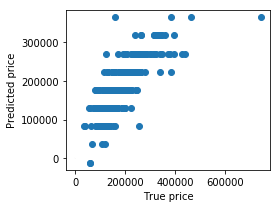

In [146]:
from sklearn.model_selection import train_test_split

trainA = pd.concat([train.OverallQual, train.OverallQual], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(trainA, train.SalePrice)

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test
import numpy as np
import math

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
#plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

print("RMS: %r " % np.sqrt(np.mean((np.log(predicted) - np.log(expected)) ** 2)))


In [86]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000
OverallQual      0.791
GrLivArea        0.709
GarageCars       0.640
GarageArea       0.623
TotalBsmtSF      0.614
1stFlrSF         0.606
FullBath         0.561
TotRmsAbvGrd     0.534
YearBuilt        0.523
YearRemodAdd     0.507
Fireplaces       0.467
BsmtFinSF1       0.386
WoodDeckSF       0.324
2ndFlrSF         0.319
OpenPorchSF      0.316
HalfBath         0.284
LotArea          0.264
BsmtFullBath     0.227
BsmtUnfSF        0.214
BedroomAbvGr     0.168
ScreenPorch      0.111
PoolArea         0.092
MoSold           0.046
3SsnPorch        0.045
BsmtFinSF2      -0.011
BsmtHalfBath    -0.017
MiscVal         -0.021
Id              -0.022
LowQualFinSF    -0.026
YrSold          -0.029
OverallCond     -0.078
MSSubClass      -0.084
EnclosedPorch   -0.129
KitchenAbvGr    -0.136
Name: SalePrice, dtype: float64


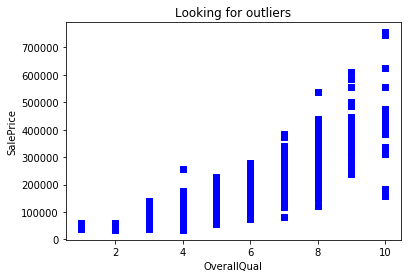

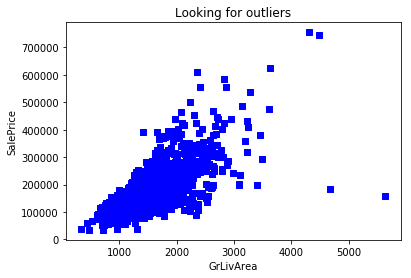

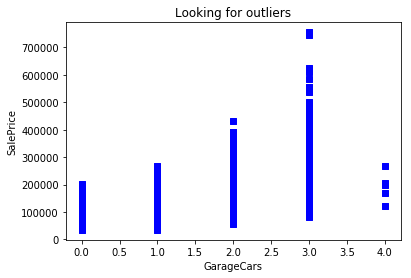

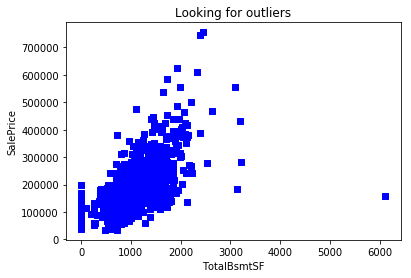

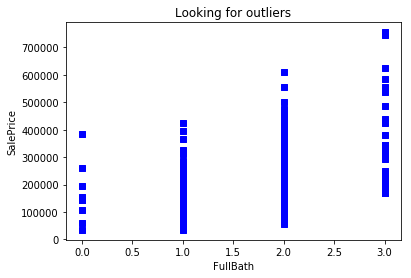

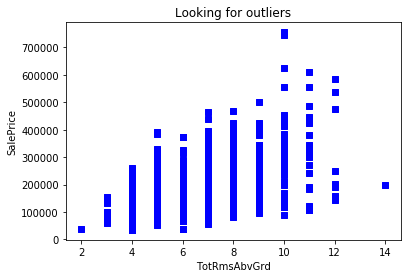

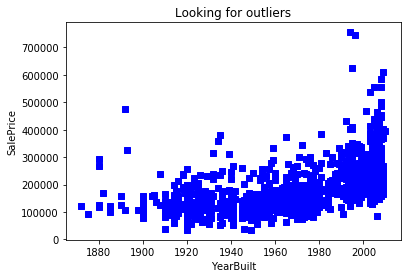

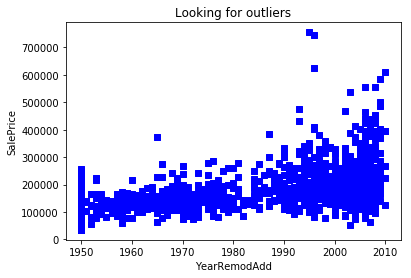

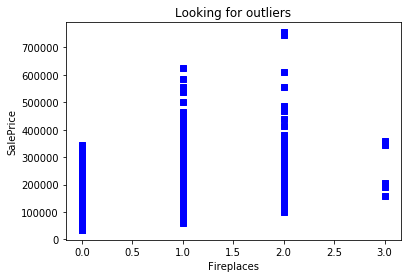

In [135]:
#OverallQual      0.791
#GrLivArea        0.709
#GarageCars       0.640
#GarageArea       0.623
#TotalBsmtSF      0.614
#1stFlrSF         0.606
#FullBath         0.561
#TotRmsAbvGrd     0.534
#YearBuilt        0.523
#YearRemodAdd     0.507



plt.scatter(train.OverallQual, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()
#train = train[train.OverallQual < 4000]

plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()
#train = train[train.GrLivArea < 4000]

plt.scatter(train.GarageCars, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.show()
#train = train[train.GarageCars < 4000]


plt.scatter(train.TotalBsmtSF, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show()
#train = train[train.TotalBsmtSF < 4000]


plt.scatter(train.FullBath, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("FullBath")
plt.ylabel("SalePrice")
plt.show()
#train = train[train.FullBath < 4000]


plt.scatter(train.TotRmsAbvGrd, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.show()
#train = train[train.TotRmsAbvGrd < 4000]

plt.scatter(train.YearBuilt, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show()
#train = train[train.YearBuilt < 4000]

plt.scatter(train.YearRemodAdd, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("YearRemodAdd")
plt.ylabel("SalePrice")
plt.show()
#train = train[train.YearRemodAdd < 4000]


plt.scatter(train.Fireplaces, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("Fireplaces")
plt.ylabel("SalePrice")
plt.show()
#train = train[train.Fireplaces < 4000]




In [90]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)


25000


Creating the bag of words...



array(<25000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 1990318 stored elements in Compressed Sparse Row format>,
      dtype=object)

(25000, 5000)


['abandoned', 'abc', 'abilities', 'ability', 'able', 'abraham', 'absence', 'absent', 'absolute', 'absolutely', 'absurd', 'abuse', 'abusive', 'abysmal', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'accepted', 'access', 'accident', 'accidentally', 'accompanied', 'accomplished', 'according', 'account', 'accuracy', 'accurate', 'accused', 'achieve', 'achieved', 'achievement', 'acid', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activities', 'actor', 'actors', 'actress', 'actresses', 'acts', 'actual', 'actually', 'ad', 'adam', 'adams', 'adaptation', 'adaptations', 'adapted', 'add', 'added', 'adding', 'addition', 'adds', 'adequate', 'admire', 'admit', 'admittedly', 'adorable', 'adult', 'adults', 'advance', 'advanced', 'advantage', 'adventure', 'adventures', 'advertising', 'advice', 'advise', 'affair', 'affect', 'affected', 'afford', 'aforementioned', 'afraid', 'africa', 'african', 'afternoon', 'afterwards', 'age', 'aged', 'agent', 'agents', 'ages', 'aging', 'ago', 'ag

Training the random forest (this may take a while)...


(25000, 2)
Cleaning and parsing the test set movie reviews...

Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000

